In [1]:
#%matplotlib notebook  
from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import ROOT
import db
from cw_pasttrec_functions import *

from my_utils import *
set_width_max_of_jupyterpad()

    
def hist_rms(x,y):
  counts = np.sum(y)
  weights = y / counts
  mean = np.dot(x,weights)
  deviations = x - mean
  return np.sqrt(np.dot(deviations**2,weights))
def list_rms(x):
  mean = sum(x)/len(x)
  deviations = x - mean
  return np.sqrt(sum(deviations**2) /len(x))
def MeanArrays(xs,ys):
    return np.dot(xs,ys)/sum(ys)
def fwhm(x,y):
  dummy, t1, tot = sigproc_kit.discriminate(x,y,np.max(y)/2.,0,0)
  return tot

Welcome to JupyROOT 6.14/04


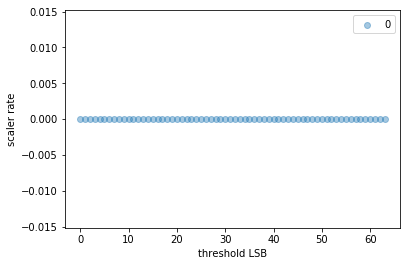

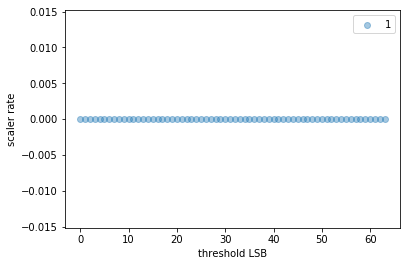

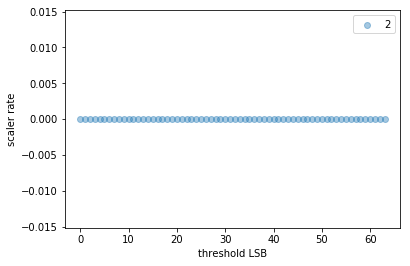

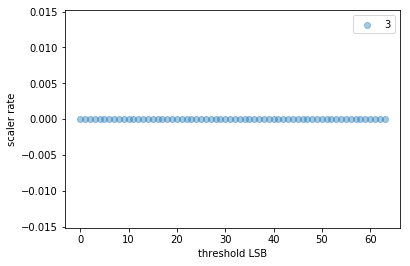

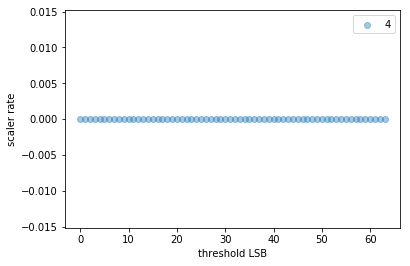

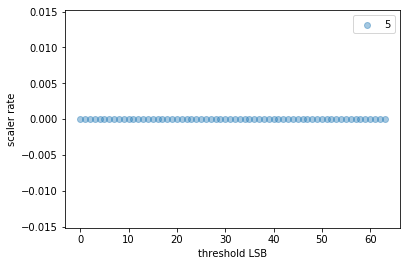

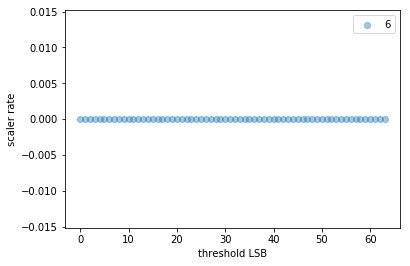

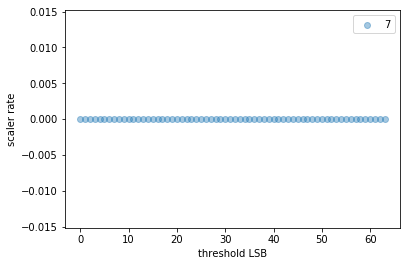

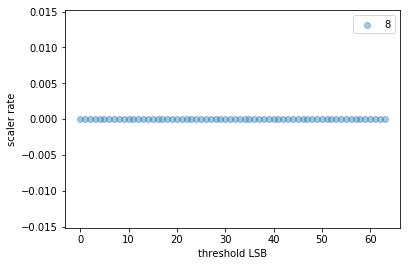

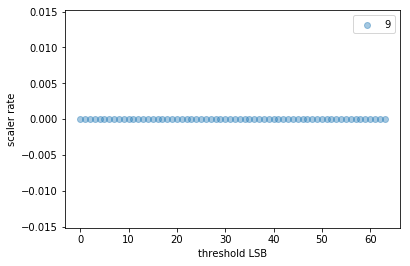

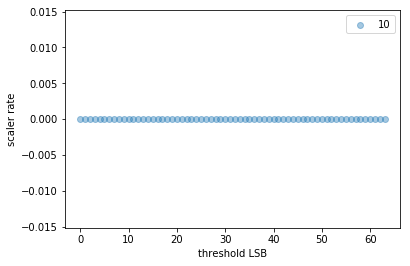

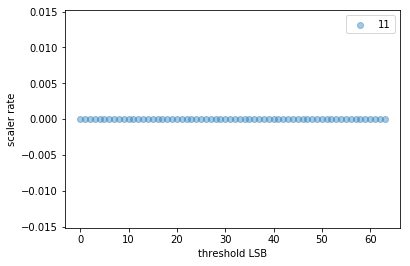

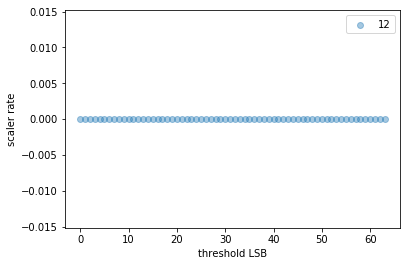

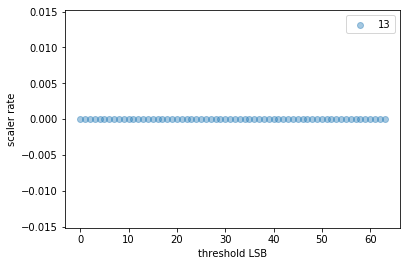

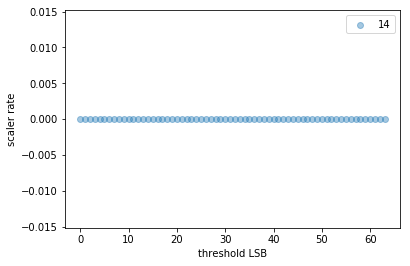

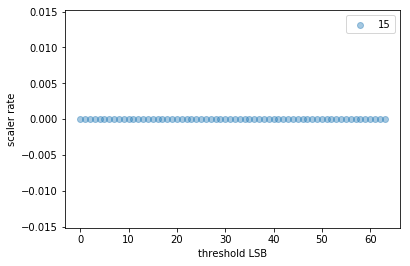

In [4]:
name="1111"
ptc.init_active_boards()  
baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)        
#read threshold_scan from database:
dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
tsbl_range    = dummy_calib["tsbl_range"]

 #plot current scan results for all channels:
for ch in range(0,16): 
    plt.scatter(tsbl_range,tsbl_scan_raw[ch], alpha=0.4,label = ch)     
    plt.xlabel("threshold LSB")
    plt.ylabel("scaler rate")
    plt.legend()
    #         plt.savefig("noise_channels.png", bbox_inches='tight')       
    plt.show()